In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../data/rankings.tab',sep='\t')
df.head()

,location_id,year,sitc_eci,hs_eci,growth_proj,sitc_eci_rank,hs_eci_rank,code
0,2,1995,-2.001223,-2.148367,NaN,127.0,217.0,AGO
1,2,1996,-2.120867,-2.144461,NaN,129.0,215.0,AGO
2,2,1997,-1.800330,-1.424870,NaN,127.0,204.0,AGO
3,2,1998,-1.756738,-1.650229,NaN,127.0,206.0,AGO
4,2,1999,-1.703370,-1.384564,NaN,124.0,202.0,AGO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 8 columns):
location_id      3059 non-null int64
year             3059 non-null int64
sitc_eci         3033 non-null float64
hs_eci           3033 non-null float64
growth_proj      1704 non-null float64
sitc_eci_rank    3033 non-null float64
hs_eci_rank      3033 non-null float64
code             3059 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 191.3+ KB


### There's a lot of missing data in growth projections. Let's explore...

In [4]:
df.code.nunique() # the are 133 countries in the dataset

133

In [5]:
df[df.growth_proj.isna()].code.nunique() #looks like all countries have null entries, so checking by year

133

In [6]:
df[~df.growth_proj.isna()].year.value_counts() #number of countries with values by year, we have complete data for 2017 

2017    133
2016    124
2014    121
2013    121
2012    121
2011    121
2010    121
2009    121
2008    121
2007    121
2006    121
2005    121
2004    121
2015    116
Name: year, dtype: int64

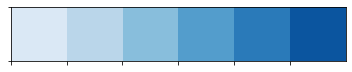

In [7]:
# chose color pallete
current_palette = sns.color_palette('Blues')
sns.palplot(current_palette)

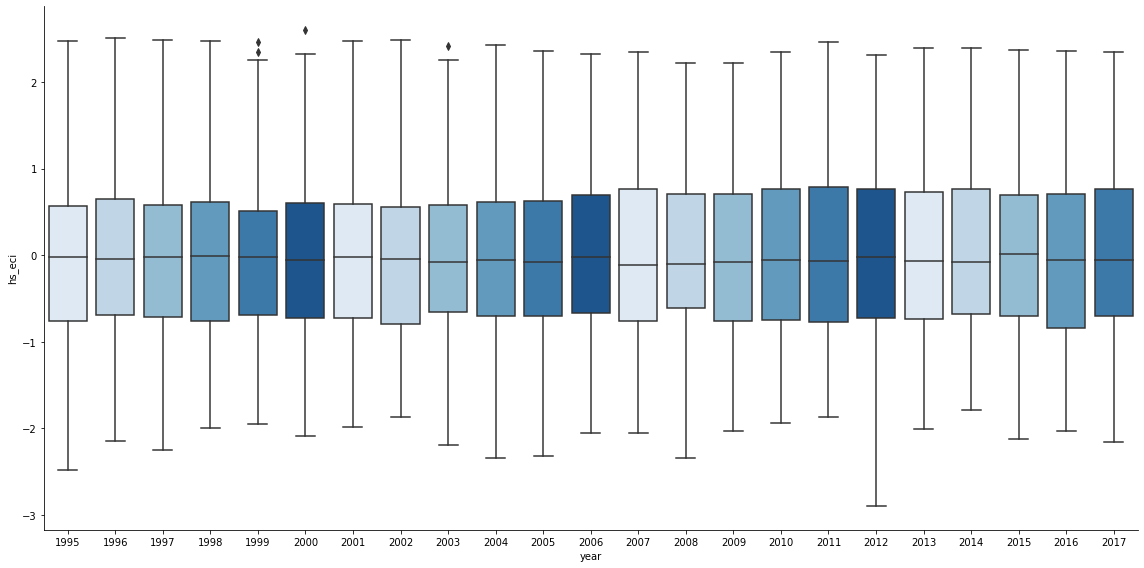

In [8]:
sns.catplot('year','hs_eci', data=df, kind='box', height=8, aspect=2, palette=current_palette)


In [9]:
_2017 = df[df['year']==2017]
_2017.head()

,location_id,year,sitc_eci,hs_eci,growth_proj,sitc_eci_rank,hs_eci_rank,code
22,2,2017,-1.822037,-1.669029,3.28,132.0,227.0,AGO
45,4,2017,-0.288839,-0.352236,3.31,78.0,155.0,ALB
68,7,2017,0.057493,0.247848,0.90,60.0,104.0,ARE
91,8,2017,-0.156561,-0.024405,2.44,72.0,127.0,ARG
114,9,2017,-0.416436,-0.150145,4.17,85.0,138.0,ARM


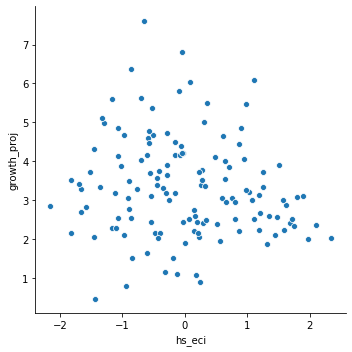

In [10]:
sns.relplot('hs_eci', 'growth_proj', data=_2017, kind='scatter')

### Initial Cluster Model

In [11]:
from sklearn.cluster import KMeans
seed=2

In [12]:
X = _2017[['hs_eci','growth_proj']]
X.head()

,hs_eci,growth_proj
22,-1.669029,3.28
45,-0.352236,3.31
68,0.247848,0.90
91,-0.024405,2.44
114,-0.150145,4.17


In [13]:
km = KMeans(random_state=seed)
km.fit(X)
y_hat = km.predict(X)

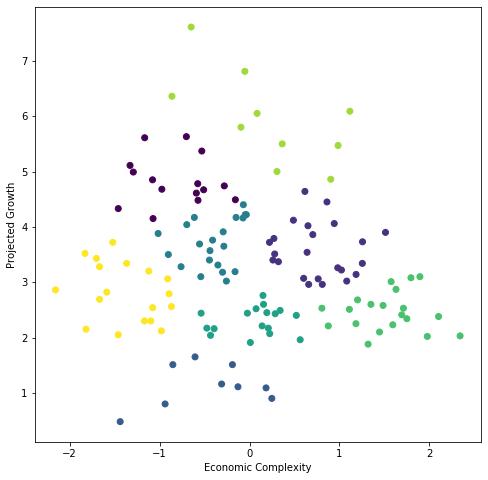

In [14]:
_=plt.figure(figsize=(8,8))
_=plt.scatter(X.hs_eci, X.growth_proj, c=y_hat)
_=plt.xlabel('Economic Complexity')
_=plt.ylabel('Projected Growth')

**Where can we go from here? some ideas we've discussed...**
1. use these clusters as our targets and build models with different independent variables to predict classification. We can try lr, decision tree, knn, and svm. Then combine several of them into a voting model to improve accuracy.
2. use these clusters as one of our explanatory variables to predict a another target. 

**To do...**
1. Find optimal number of clusters
2. Final df by Friday?
3. Split up research on topic and models (Thursday)

In [15]:
loc = pd.read_csv('../data/location.tab',sep='\t') # import country names
loc.head()

,location_id,location_code,location_name_short_en,level,parent_id
0,0,ABW,Aruba,country,356.0
1,1,AFG,Afghanistan,country,353.0
2,2,AGO,Angola,country,352.0
3,3,AIA,Anguilla,country,356.0
4,4,ALB,Albania,country,355.0
